In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML, Markdown
from legacy_lcgs import *

In [2]:
RNG = 'LCG'
SEED = 12345
VERTICES = 4
COORDS = 10000

In [3]:
Markdown(f"""# Chaos Game Class Demo with {RNG} Random Number Generator
By Katie Wuestney""")

# Chaos Game Class Demo with LCG Random Number Generator
By Katie Wuestney

In [4]:
if RNG == 'default_rng':
    rng = np.random.default_rng(SEED)
elif RNG == 'LCG':
    #one of the worst set of LCG params
    rng = LCG(SEED, **{'a' : 950706376, 'b' : 0, 'm' : (2**31 - 1)})
elif RNG == 'Mersenne':
    rng = np.random.Generator(np.random.MT19937(SEED))
elif RNG == 'RANDU':
    rng = RANDU(SEED)
elif RNG == 'PASCAL':
    rng = PASCAL(SEED)
elif RNG == 'ANSI_C':
    rng = ANSI_C(SEED)

In [5]:
# for i in range(5):
#     print(rng())

1406932606
654583775
1449466924
229283573

In [6]:
def ngon_coords(verts):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    return x_vals, y_vals

In [7]:
class chaos_game:
    def __init__(self, verts, points, RNG=np.random.default_rng()):
        #self.fig = fig
        #self.ax = ax
        self.verts = verts
        self.points = points
        #get vertex coordinates
        x_vals, y_vals = ngon_coords(verts)
        self.x_vals = x_vals
        self.y_vals = y_vals
        vert_coords = np.column_stack((x_vals, y_vals))
        #print(vert_coords)
        xmin = x_vals.min() - 0.2
        xmax = x_vals.max() + 0.2
        ymin = y_vals.min() - 0.2
        ymax = y_vals.max() + 0.2
        self.xlims = (xmin, xmax)
        self.ylims = (ymin, ymax)
        #c is starting coordinate
        c = np.array([0.0, 0.25])

        #initiate figure instance
        self.fig, self.ax = plt.subplots(figsize=(4, 4))
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        rng = RNG
        self.randints = list(rng.integers(0, verts, points))
        #print(self.randints)
#         if RNG == 'default_rng':
#             rng = np.random.default_rng()
#             self.randints = rng.integers(0, verts, points)
#         elif RNG == 'LCG':
#             rng = LCG()
#             self.randints = list(rng.ints(0, verts, points))
#         elif RNG == 'Mersenne':
#             rng = np.random.Generator(np.random.MT19937())
#             self.randints = rng.integers(0, verts, points)
#         elif RNG == 'RANDU':
#             rng = RANDU(33)
#             self.randints = list(rng.ints(0, verts, points))
#         elif RNG == 'PASCAL':
#             rng = PASCAL(33)
#             self.randints = list(rng.ints(0, verts, points))
        coords = [c]
        #firstpts = 10
        for i in self.randints:
            coords.append((coords[-1] + vert_coords[i])/2)
        self.coords = coords[1:]
        
    def plot(self):
        x, y = zip(*self.coords)
        self.ax.scatter(self.x_vals, self.y_vals, c='b', label='vertices')
        self.ax.legend()
        for i, xy in enumerate(zip(self.x_vals, self.y_vals)):
            self.ax.annotate(f'{i}', xy, xycoords='data', xytext=(4,4), textcoords='offset points')
        self.ax.scatter(x, y, s=1, c='g')
        return
        
    def savefig(self, filename, **kwargs):
        self.fig.savefig(filename, **kwargs)
        return

    def init_frame(self):
        self.ax.cla()
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        self.ax.scatter(x=0, y=0.25, s=1, c='r', label='inital point')
        self.ax.scatter(self.x_vals, self.y_vals, c='b', label='vertices')
        self.ax.legend()
        for i, xy in enumerate(zip(self.x_vals, self.y_vals)):
            self.ax.annotate(f'{i}', xy, xycoords='data', xytext=(4,4), textcoords='offset points')
        return
    
    def animation(self, i):
        i_from = i * self.chunks
        # are we on the last frame?
        if i_from + self.chunks > len(self.coords) - 1:
            i_to = len(self.coords) - 1
        else:
            i_to = i_from + self.chunks
        rows = self.coords[i_from:i_to]
        x, y = zip(*rows)
        self.ax.scatter(x, y, s=1, c='g')
        return
    
    def animate(self, chunks=20):
        self.chunks = chunks
        self.frame_chunks = self.points // self.chunks
        self.ani = FuncAnimation(self.fig, self.animation, frames=self.frame_chunks, init_func=self.init_frame, interval=5, repeat=True, blit=True)
        plt.show()
        
    def movie(self):
        movie1 = self.ani.to_jshtml()
        return movie1
    
    def pause(self):
        self.ani.pause()
        return

[[ 1.0000000e+00  0.0000000e+00]
 [ 6.1232340e-17  1.0000000e+00]
 [-1.0000000e+00  1.2246468e-16]
 [-1.8369702e-16 -1.0000000e+00]]
[1, 0, 2, 2, 2, 0, 0, 3, 0, 0, 1, 3, 3, 0, 0, 1, 2, 3, 3, 0, 3, 1, 1, 1, 2, 0, 3, 0, 0, 1, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 1, 1, 0, 2, 3, 1, 0, 1, 0, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 2, 0, 3, 1, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 3, 2, 2, 2, 3, 3, 1, 1, 1, 2, 3, 0, 1, 3, 3, 0, 2, 2, 3, 1, 2, 2, 3, 3, 1, 3, 0, 2, 1, 3, 1, 0, 3, 1, 1, 0, 3, 1, 0, 1, 2, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 0, 3, 1, 3, 3, 3, 3, 0, 2, 2, 2, 3, 3, 2, 1, 0, 1, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 1, 1, 3, 3, 2, 0, 3, 0, 3, 1, 1, 3, 1, 0, 1, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 1, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 1, 1, 0, 3, 2, 3, 1, 1, 0, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 1, 3, 0, 2, 1, 2, 1, 2, 0, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 2, 0, 3,

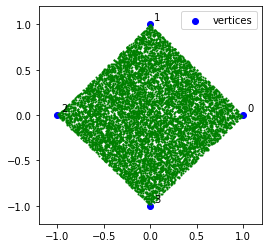

In [8]:
cg = chaos_game(VERTICES, COORDS, RNG=rng)
cg.plot()

In [9]:
#cg.animate()

In [10]:
#papermill_description=ENCODING_ANIMATION
#mv = cg.movie()
#HTML(mv)